In [1]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("alessiocorrado99/animals10")

# print("Path to dataset files:", path)

In [2]:
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Carregar o modelo ResNet50 pré-treinado e remover a última camada de classificação
base_model = ResNet50(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.layers[-2].output)  # Extraindo a penúltima camada

# 2. Função para extrair embeddings de uma pasta
def extrair_embeddings(folder_path):
    # terminando com .jpeg e .jpg
    img_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpeg') or f.endswith('.jpg')]
    # img_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpeg')]
    embeddings = []
    for img_path in img_paths:
        img = image.load_img(img_path, target_size=(224, 224))
        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data)
        embedding = model.predict(img_data)
        embeddings.append(embedding[0])  # Remove a dimensão de batch
    return embeddings


In [3]:

# 3. Extrair embeddings das quatro classes
print("Embeddings da classe 1:")
embeddings_class1 = extrair_embeddings('raw-img/cachorro')
print("Embeddings da classe 2:")
embeddings_class2 = extrair_embeddings('raw-img/cavalo')
print("Embeddings da classe 3:")
embeddings_class3 = extrair_embeddings('raw-img/elefant')
print("Embeddings da classe 4:")
embeddings_class4 = extrair_embeddings('raw-img/galinha')
print("Embeddings da classe 5:")
embeddings_class5 = extrair_embeddings('raw-img/gato')
print("fim")


Embeddings da classe 1:
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 

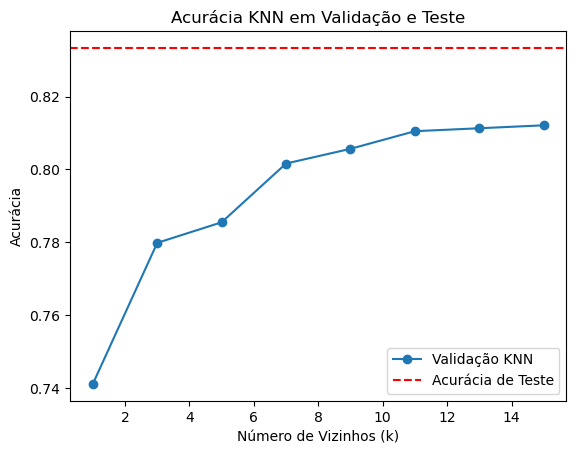

Melhor número de vizinhos (k): 15
Acurácia de teste: 0.8333333333333334


In [10]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Supondo que os embeddings de cada classe já estejam definidos
# 1. Converter os embeddings em uma matriz numpy para aplicar o PCA
all_embeddings = np.array(embeddings_class1 + embeddings_class2 + embeddings_class3 + embeddings_class4 + embeddings_class5)
labels = (['Class 1'] * len(embeddings_class1) + 
          ['Class 2'] * len(embeddings_class2) + 
          ['Class 3'] * len(embeddings_class3) + 
          ['Class 4'] * len(embeddings_class4) + 
          ['Class 5'] * len(embeddings_class5))

# 2. Dividir os dados em treino, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(all_embeddings, labels, test_size=0.4, stratify=labels, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# 3. Normalizar apenas o conjunto de treino e aplicar nos outros conjuntos
scaler = StandardScaler()  # Ou MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)

# 4. Reduzir a dimensionalidade com PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_normalized)
X_val_pca = pca.transform(X_val_normalized)
X_test_pca = pca.transform(X_test_normalized)

# 5. Treinar e validar o modelo com K-Fold no conjunto de treino+validação e calcular o erro no conjunto de teste
neighbors = [1, 3, 5, 7, 9, 11, 13, 15]
knn_accuracies = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for n in neighbors:
    fold_accuracies = []
    for train_index, val_index in kf.split(X_train_pca):
        X_fold_train, X_fold_val = X_train_pca[train_index], X_train_pca[val_index]
        y_fold_train, y_fold_val = np.array(y_train)[train_index], np.array(y_train)[val_index]
        
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_fold_train, y_fold_train)
        y_fold_pred = knn.predict(X_fold_val)
        fold_accuracies.append(accuracy_score(y_fold_val, y_fold_pred))
        
    # Média das acurácias de validação
    knn_accuracies.append(np.mean(fold_accuracies))

# 6. Avaliar no conjunto de teste com o melhor número de vizinhos
best_n = neighbors[np.argmax(knn_accuracies)]
knn_best = KNeighborsClassifier(n_neighbors=best_n)
knn_best.fit(X_train_pca, y_train)
y_test_pred = knn_best.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_test_pred)

# 7. Plotar os resultados de validação para escolher o melhor k e comparar com a acurácia de teste
plt.plot(neighbors, knn_accuracies, marker='o', label='Validação KNN')
plt.axhline(test_accuracy, color='r', linestyle='--', label='Acurácia de Teste')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.title('Acurácia KNN em Validação e Teste')
plt.legend()
plt.show()

print(f"Melhor número de vizinhos (k): {best_n}")
print(f"Acurácia de teste: {test_accuracy}")


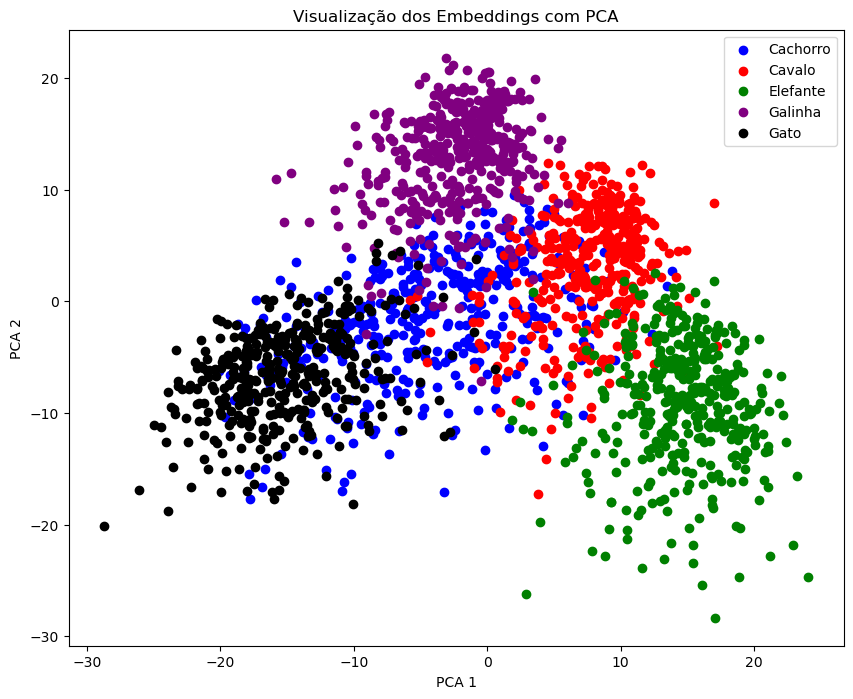

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# 4. Converter os embeddings em uma matriz numpy para aplicar o PCA
all_embeddings = np.array(embeddings_class1 + embeddings_class2 + embeddings_class3 + embeddings_class4 + embeddings_class5)
labels = (['Class 1'] * len(embeddings_class1) + 
          ['Class 2'] * len(embeddings_class2) + 
          ['Class 3'] * len(embeddings_class3) + 
          ['Class 4'] * len(embeddings_class4) + 
          ['Class 5'] * len(embeddings_class5))

# Normalizar os dados
scaler = StandardScaler()
all_embeddings_normalized = scaler.fit_transform(all_embeddings)

# MinMaxScaler
# scaler = MinMaxScaler()
# all_embeddings_normalized = scaler.fit_transform(all_embeddings)

# 5. Reduzir a dimensionalidade com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(all_embeddings_normalized)

# 6. Visualizar com cores diferentes para cada classe
plt.figure(figsize=(10, 8))

# Plot para cada classe com índices mais explícitos
plt.scatter(X_pca[:len(embeddings_class1), 0], X_pca[:len(embeddings_class1), 1], color='blue', label='Cachorro')

plt.scatter(X_pca[len(embeddings_class1):len(embeddings_class1) + len(embeddings_class2), 0],
            X_pca[len(embeddings_class1):len(embeddings_class1) + len(embeddings_class2), 1],
            color='red', label='Cavalo')

plt.scatter(X_pca[len(embeddings_class1) + len(embeddings_class2):len(embeddings_class1) + len(embeddings_class2) + len(embeddings_class3), 0],
            X_pca[len(embeddings_class1) + len(embeddings_class2):len(embeddings_class1) + len(embeddings_class2) + len(embeddings_class3), 1],
            color='green', label='Elefante')

plt.scatter(X_pca[len(embeddings_class1) + len(embeddings_class2) + len(embeddings_class3):len(embeddings_class1) + len(embeddings_class2) + len(embeddings_class3) + len(embeddings_class4), 0],
            X_pca[len(embeddings_class1) + len(embeddings_class2) + len(embeddings_class3):len(embeddings_class1) + len(embeddings_class2) + len(embeddings_class3) + len(embeddings_class4), 1],
            color='purple', label='Galinha')

plt.scatter(X_pca[len(embeddings_class1) + len(embeddings_class2) + len(embeddings_class3) + len(embeddings_class4):len(embeddings_class1) + len(embeddings_class2) + len(embeddings_class3) + len(embeddings_class4) + len(embeddings_class5), 0],
            X_pca[len(embeddings_class1) + len(embeddings_class2) + len(embeddings_class3) + len(embeddings_class4):len(embeddings_class1) + len(embeddings_class2) + len(embeddings_class3) + len(embeddings_class4) + len(embeddings_class5), 1],
            color='black', label='Gato')

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualização dos Embeddings com PCA")
plt.legend()
plt.show()


In [5]:
import pandas as pd
df = pd.DataFrame(X_pca, columns=['PCA 1', 'PCA 2'])
df['Label'] = labels
df

,PCA 1,PCA 2,Label
0,-14.517633,-4.021700,Class 1
1,10.147584,-0.966497,Class 1
2,-5.390740,-3.391772,Class 1
3,-2.451787,-6.571664,Class 1
4,-9.670523,-0.672403,Class 1
...,...,...,...
2063,-17.914125,-12.088283,Class 5
2064,-13.469023,-0.049701,Class 5
2065,-15.437743,-3.209815,Class 5
2066,-21.783926,-9.243830,Class 5


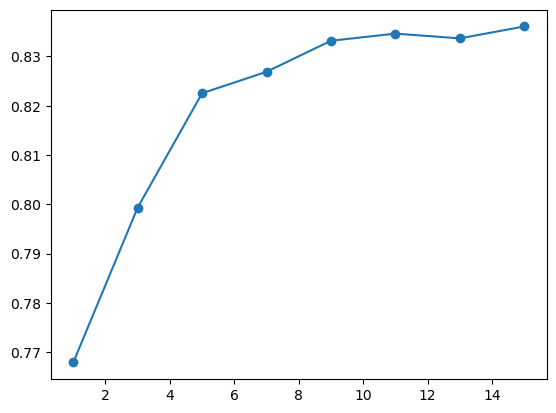

In [6]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt

# Dados de entrada
X = df[['PCA 1', 'PCA 2']]
y = df['Label']

# Configuração do K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 1. KNN
neighbors = [1, 3, 5, 7, 9, 11, 13, 15]
knn_accuracies = []
for n in neighbors:
    fold_accuracies = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_val)
        fold_accuracies.append(accuracy_score(y_val, y_pred))
        
    knn_accuracies.append(sum(fold_accuracies) / len(fold_accuracies))

plt.plot(neighbors, knn_accuracies, marker='o', label='KNN')


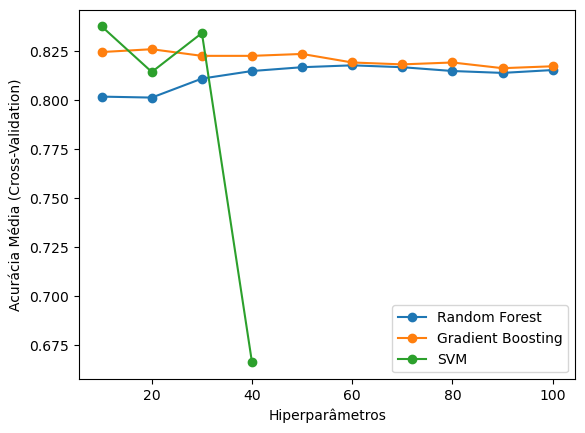

In [7]:

# 2. Random Forest
n_estimators = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
rf_accuracies = []
for n in n_estimators:
    fold_accuracies = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        rf = RandomForestClassifier(n_estimators=n)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        fold_accuracies.append(accuracy_score(y_val, y_pred))
        
    rf_accuracies.append(sum(fold_accuracies) / len(fold_accuracies))

plt.plot(n_estimators, rf_accuracies, marker='o', label='Random Forest')

# 3. Gradient Boosting
gb_accuracies = []
for n in n_estimators:
    fold_accuracies = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        gb = GradientBoostingClassifier(n_estimators=n)
        gb.fit(X_train, y_train)
        y_pred = gb.predict(X_val)
        fold_accuracies.append(accuracy_score(y_val, y_pred))
        
    gb_accuracies.append(sum(fold_accuracies) / len(fold_accuracies))

plt.plot(n_estimators, gb_accuracies, marker='o', label='Gradient Boosting')

# 4. SVM
dic_kernels = {'linear': 10, 'poly': 20, 'rbf': 30, 'sigmoid': 40}
svm_accuracies = []
for kernel in dic_kernels:
    fold_accuracies = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        svm = SVC(kernel=kernel)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_val)
        fold_accuracies.append(accuracy_score(y_val, y_pred))
        
    svm_accuracies.append(sum(fold_accuracies) / len(fold_accuracies))

plt.plot(list(dic_kernels.values()), svm_accuracies, marker='o', label='SVM')

# Configurações do gráfico
plt.xlabel('Hiperparâmetros')
plt.ylabel('Acurácia Média (Cross-Validation)')
plt.legend()
plt.show()
